In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/day 31')

In [0]:
train_ = pd.read_csv('HistoricalQuotes.csv')  

In [0]:

train1=train_[["volume","high","low"]]

In [0]:
train1=train1.loc[1:,:]

In [0]:
train1

In [0]:
lis1=[]
for x in range(1,1315):
  avg=(float(train1["high"][x])+float(train1["low"][x]))/2
  lis1.append(avg)

In [0]:
les=pd.DataFrame({"vol":(train1["volume"].astype(float)),"avg":lis1})

In [0]:
les1 = les.sort_index(axis=0 ,ascending=False)

In [0]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

les_scaled = scaler.fit_transform(les1)  

In [130]:
les_scaled

array([[4.59375422e-04, 8.73927954e-02],
       [2.96718839e-03, 9.00517796e-02],
       [2.54809804e-04, 8.93075185e-02],
       ...,
       [9.45059956e-02, 7.41038539e-01],
       [9.42139512e-02, 7.57482257e-01],
       [9.90268957e-02, 7.56554857e-01]])

In [0]:
tes=les_scaled[919:,:]


In [163]:
tes.shape

(395, 2)

In [0]:
tra=les_scaled[0:919,:]

In [164]:
tra.shape

(919, 2)

In [0]:
features_set = []  
labels = []  
for i in range(50, 919):  
    features_set.append(tra[i-50:i,0:2])
    labels.append(tra[i, 0])

In [0]:
features_set, labels = np.array(features_set), np.array(labels)  

In [138]:
features_set.shape

(869, 50, 2)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 2))  

In [142]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

Using TensorFlow backend.


In [143]:
model = Sequential()

W0617 12:28:20.580841 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [144]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 2))) 

W0617 12:29:17.290184 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:29:17.311148 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [145]:
model.add(Dropout(0.2)) 

W0617 12:29:46.533112 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 12:29:46.549117 140401475671936 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [146]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
Total params: 10,600
Trainable params: 10,600
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.add(Dense(units = 1)) 

In [149]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


W0617 12:33:58.786816 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [150]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


W0617 12:34:16.365528 140401475671936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0617 12:34:19.118883 140401475671936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
869/869 [==============================] - 7s 8ms/step - loss: 0.0092
Epoch 2/100
869/869 [==============================] - 4s 4ms/step - loss: 0.0065
Epoch 3/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0069
Epoch 4/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0067
Epoch 5/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0067
Epoch 6/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0067
Epoch 7/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0065
Epoch 8/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0066
Epoch 9/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0066
Epoch 10/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0067
Epoch 11/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0063
Epoch 12/100
869/869 [==============================] - 4s 5ms/step - loss: 0.0064
Epoch 13/100


In [152]:
tes.shape

(395, 2)

In [0]:
test_features = []  
for i in range(50, 395):  
    test_features.append(tes[i-50:i, 0:2])


In [0]:
test_features = np.array(test_features) 

In [157]:
test_features.shape

(345, 50, 2)

In [0]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 2))  

In [0]:
predictions = model.predict(test_features)  

In [166]:
predictions.shape

(345, 1)

In [168]:
tes[:,0]

array([0.10062224, 0.12193223, 0.07989337, 0.09763782, 0.06625225,
       0.04746855, 0.11659693, 0.12678537, 0.21847626, 0.15387919,
       0.17056376, 0.17030321, 0.18467565, 0.11220281, 0.13011567,
       0.11488755, 0.10610451, 0.11408831, 0.10878154, 0.1391362 ,
       0.29313526, 0.13853794, 0.11663488, 0.11308109, 0.08780315,
       0.06703624, 0.06757529, 0.11339467, 0.07402754, 0.07885762,
       0.1102204 , 0.12756864, 0.08927432, 0.11413129, 0.09320611,
       0.0800459 , 0.0928029 , 0.08701172, 0.15347437, 0.139852  ,
       0.10699715, 0.10650072, 0.12401216, 0.14428946, 0.11681145,
       0.12336491, 0.1304183 , 0.17704266, 0.11927539, 0.13761874,
       0.13600814, 0.21284595, 0.43336033, 0.33749029, 0.3072415 ,
       0.2104039 , 0.25139661, 0.31367069, 0.18357701, 0.1081926 ,
       0.13814756, 0.1594912 , 0.15004628, 0.12395591, 0.13451266,
       0.1167822 , 0.10609598, 0.13520962, 0.15835299, 0.16740331,
       0.22465791, 0.2030818 , 0.10174448, 0.13360961, 0.11390

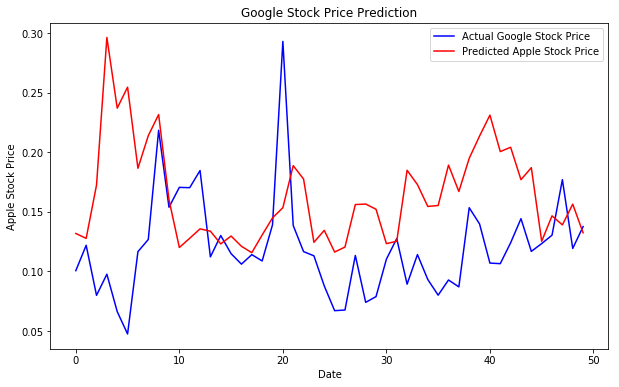

In [173]:
plt.figure(figsize=(10,6))  
plt.plot(tes[0:50,0], color='blue', label='Actual Google Stock Price')  
plt.plot(predictions[0:50] , color='red', label='Predicted Apple Stock Price')  
plt.title('Google Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show() 